In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('heart.csv')
df.shape

(918, 12)

In [42]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [43]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [44]:
zscore_RestingBP = (df['RestingBP'] - df['RestingBP'].mean())/df['RestingBP'].std()


In [45]:
(zscore_RestingBP <-3).value_counts()

False    917
True       1
Name: RestingBP, dtype: int64

In [51]:
df = df[(zscore_RestingBP >-3) &(zscore_RestingBP < 3)]

In [52]:
df.shape

(910, 12)

In [54]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,53.493407,132.052747,199.121978,0.231868,136.813187,0.883626,0.550549
std,9.448340,17.177564,109.144788,0.422257,25.370093,1.063561,0.497712
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.550000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,185.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [55]:
zscore_cholestrol = (df['Cholesterol'] - df['Cholesterol'].mean())/df['Cholesterol'].std()

In [64]:
df = df[(zscore_cholestrol >-3) & (zscore_cholestrol < 3)]

In [65]:
df.shape

(907, 12)

In [66]:
df['FastingBS'].value_counts()

0    697
1    210
Name: FastingBS, dtype: int64

In [67]:
zscore_MaxHR = (df['MaxHR'] - df['MaxHR'].mean())/df['MaxHR'].std()

In [70]:
df = df[(zscore_MaxHR > -3) & (zscore_MaxHR < 3)]

In [71]:
df.shape

(906, 12)

In [72]:
zscore_Oldpeak = (df['Oldpeak'] - df['Oldpeak'].mean())/df['Oldpeak'].std()

In [75]:
df = df[(zscore_Oldpeak > -3) & (zscore_Oldpeak < 3)]

In [76]:
df.shape

(899, 12)

In [77]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [79]:
df['Sex'] = df['Sex'].apply(lambda x: 'Male' if x == 'M' else 'Female')

In [87]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,Female,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,Female,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,Male,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [88]:
encoded_data = pd.get_dummies(df,columns=['Sex','ExerciseAngina'])

In [93]:
encoded_data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_Female,Sex_Male,ExerciseAngina_N,ExerciseAngina_Y
0,40,ATA,140,289,0,Normal,172,0.0,Up,0,0,1,1,0
1,49,NAP,160,180,0,Normal,156,1.0,Flat,1,1,0,1,0
2,37,ATA,130,283,0,ST,98,0.0,Up,0,0,1,1,0
3,48,ASY,138,214,0,Normal,108,1.5,Flat,1,1,0,0,1
4,54,NAP,150,195,0,Normal,122,0.0,Up,0,0,1,1,0


In [97]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
encoded_data['ChestPainType'] = lb.fit_transform(encoded_data['ChestPainType'])

In [99]:
encoded_data['RestingECG'] = lb.fit_transform(encoded_data['RestingECG'])

In [100]:
encoded_data['ST_Slope'] = lb.fit_transform(encoded_data['ST_Slope'])

In [103]:
encoded_data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_Female,Sex_Male,ExerciseAngina_N,ExerciseAngina_Y
0,40,1,140,289,0,1,172,0.0,2,0,0,1,1,0
1,49,2,160,180,0,1,156,1.0,1,1,1,0,1,0
2,37,1,130,283,0,2,98,0.0,2,0,0,1,1,0
3,48,0,138,214,0,1,108,1.5,1,1,1,0,0,1
4,54,2,150,195,0,1,122,0.0,2,0,0,1,1,0


In [104]:
X = encoded_data.drop('HeartDisease',axis='columns')
y = encoded_data['HeartDisease']

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
X_scaled[0]

array([0.24489796, 0.33333333, 0.57142857, 0.55791506, 0.        ,
       0.5       , 0.78417266, 0.33333333, 1.        , 0.        ,
       1.        , 1.        , 0.        ])

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=30)

In [124]:
len(X_test)

225

In [129]:
from sklearn.svm import SVC
model = SVC(gamma='auto',kernel='linear',C=1)
model.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [130]:
model.score(X_test,y_test)

0.8311111111111111

In [131]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'kernel':['linear','rbf'],
            'C':[1,2,3,4,5,10,20,30,40,50]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,2,3,4,5,10,20,30,40,50],
            'criterion':['gini','entropy','log_loss']
        }
    },
    'logisitic_regression':{
        'model':LogisticRegression(multi_class='auto'),
        'params':{
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
        }
    }
}

In [132]:
score = []
for model_name,model_p in model_params.items():
    clf = GridSearchCV(model_p['model'],model_p['params'],cv=5,return_train_score=False)
    clf.fit(X_scaled,y)
    score.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [133]:
scores_data = pd.DataFrame(score,columns = ['model','best_score','best_params'])

In [134]:
scores_data

,model,best_score,best_params
0,svm,0.823066,"{'C': 2, 'kernel': 'rbf'}"
1,random_forest,0.828610,"{'criterion': 'log_loss', 'n_estimators': 30}"
2,logisitic_regression,0.811943,{'solver': 'liblinear'}


In [135]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.5524956 , -0.44712288, -0.35287837, ..., -0.23614176,
         0.12265814,  0.20916287],
       [-0.96385791,  0.82200734,  0.08049878, ...,  0.41603724,
         0.02544474,  0.00766731],
       [-0.47565474, -0.46720095, -0.26992552, ..., -0.08697921,
         0.02689117,  0.12605296],
       ...,
       [ 0.9362667 ,  0.09802743, -0.2778237 , ...,  0.03599353,
        -0.01728991, -0.15983065],
       [-0.96237101,  0.85012296,  0.01981623, ...,  0.2284058 ,
         0.06180915, -0.05208514],
       [-0.6085557 , -0.47906707, -0.34125656, ..., -0.15796069,
         0.18066808, -0.00479976]])

In [140]:
X_pca.shape

(899, 8)

In [137]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y,test_size=0.2,random_state=30)

In [138]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_pca,y_train_pca)

RandomForestClassifier()

In [139]:
rfmodel.score(X_test_pca,y_test_pca)

0.8444444444444444

In [141]:
y_predicted = rfmodel.predict(X_test_pca)

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pca,y_predicted)
cm

array([[70, 13],
       [15, 82]])

In [143]:
import seaborn as sns

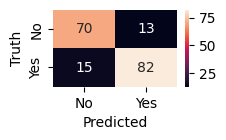

In [147]:
plt.figure(figsize=(2,1))
sns.heatmap(cm,annot=True,xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()